### Домашняя работа №2
Панов А.А, Шестаков А.В. Майнор по анализу данных 2016

<hr\>
**Общая информация**

**Срок сдачи:** 12 марта 2016, 23:59 <br\>
**Штраф за опоздание:** -0.5 за каждый день

При отправлении ДЗ на почту указывайте фамилию в названии файла, а тему письма оформляйте в следующем виде:<br\>
** [minor-da-16] *{Фамилия}* *{Имя}* ДЗ*{Номер}* **<br\>


Сопровождайте ваш код изображеними, комментариями и выводами. <br\>
Иммейте ввиду, что на некоторые задачи нет единственного верного и полного ответа. Чем больше информации вы сможете извлечь, аргументированных выводов сформулировать, тем лучше.

Используйте данный Ipython Notebook при оформлении домашнего задания.
<hr\>

## 1. Теория веротяностей. Распределения

В SciPy более 80 видов непрерывных и более 12 дискретных распределений, более 70 статистических функций

In [1]:
import scipy as sp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

plt.style.use('ggplot')

font = {'family': 'Verdana',
        'weight': 'normal'}
plt.rc('font', **font)

%matplotlib inline

**Задача 1.** Сгенерируйте три распределения: гауссовское с мат. ожиданием 1 и дисперсией 4, хи-квадрат с $k = 3$ и дискртеное пуассоновское с $\lambda = 10$.<br/> 

При генерации используйте 500 точек. Посчитайте для каждого из них обчный набор статистик: среднее, минимум, максимум, дисперсию, кривизну и смещенность.

In [4]:
normal = stats.norm.rvs(loc=1, scale=2, size=500)
chi2 = stats.chi2.rvs(3, size=500)
poisson = stats.poisson.rvs(10, size=500)

d = {'Нормальное распределение': normal, 'Распределение хи-квадрат': chi2, 'Распределение Пуассона': poisson}
#l = [normal, chi2, poisson]

for key, value in d.items():
    print(key)
    print('Среднее: ',  np.mean(value))
    print('Дисперсия: ', np.var(value))
    print('Кривизна: ', stats.kurtosis(value))
    print('Смещение: ', stats.skew(value)) 
    print('Минимум: ', min(value))
    print('Максимум: ', max(value))
    print('\n')


Распределение Пуассона
Среднее:  10.216
Дисперсия:  10.005344
Кривизна:  0.17911447779385936
Смещение:  0.35333714232049973
Минимум:  3
Максимум:  22


Нормальное распределение
Среднее:  0.960558793897
Дисперсия:  3.91540483753
Кривизна:  0.09102815882764625
Смещение:  -0.1968592641725071
Минимум:  -5.92892946319
Максимум:  6.25935702424


Распределение хи-квадрат
Среднее:  2.96538300231
Дисперсия:  5.62192712168
Кривизна:  2.319159940454571
Смещение:  1.4705205362542688
Минимум:  0.0318276674435
Максимум:  13.3776505347




**Задача 2.** Найрисуйте функцию (cdf) и плотность (pdf) распределений. На графиках pdf отметьте среднее значение и медиану.

Красная пунктирная линия - среднее, черная пунктирная линия - медиана


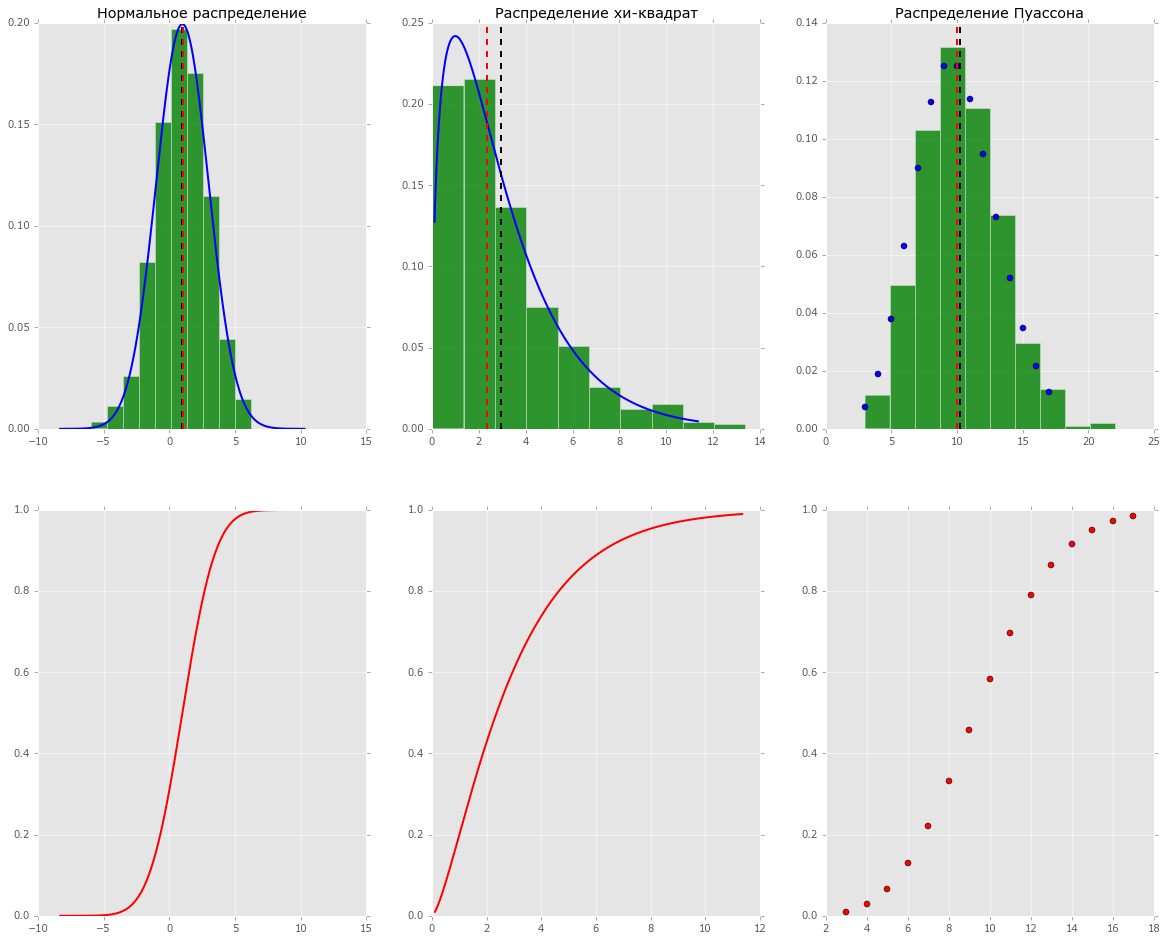

In [5]:
x1 = np.linspace(stats.norm.ppf(0.01, 1, 4), stats.norm.ppf(0.99, 1, 4), 500)
x2 = np.linspace(stats.chi2.ppf(0.01, 3), stats.chi2.ppf(0.99, 3), 500)
x3 = np.arange(stats.poisson.ppf(0.01, 10), stats.poisson.ppf(0.99, 10))

n = [np.mean(normal), np.median(normal)]
c = [np.mean(chi2), np.median(chi2)]
p = [np.mean(poisson), np.median(poisson)]

print('Красная пунктирная линия - среднее, черная пунктирная линия - медиана')
fig, ax = plt.subplots(2,3)
fig.set_size_inches(20,16)


ax[0,0].hist(normal, color='g', normed=True, alpha=0.8)
ax[0,0].plot(x1, stats.norm.pdf(x1, 1, 2), 'b-', lw=2,)
ax[1,0].plot(x1, stats.norm.cdf(x1, 1, 2), 'r-', lw=2,)
ax[0,0].axvline(n[0], color='k', linestyle='--', lw=2)
ax[0,0].axvline(n[1], color='r', linestyle='--', lw=2)



ax[0,1].hist(chi2, color='g', normed=True, alpha=0.8)
ax[0,1].plot(x2, stats.chi2.pdf(x2, 3),'b-', lw=2)
ax[1,1].plot(x2, stats.chi2.cdf(x2, 3),'r-', lw=2)
ax[0,1].axvline(c[0], color='k', linestyle='--' , lw=2)
ax[0,1].axvline(c[1], color='r', linestyle='--', lw=2)



ax[0,2].hist(poisson, color='g', normed=True, alpha=0.8)
ax[0,2].plot(x3, stats.poisson.pmf(x3, 10), 'bo', ms=6)
ax[1,2].plot(x3, stats.poisson.cdf(x3, 10), 'ro')
ax[0,2].axvline(p[0], color='k', linestyle='--', lw=2)
ax[0,2].axvline(p[1], color='r', linestyle='--', lw=2)




ax[0,0].set_title('Нормальное распределение')
ax[0,1].set_title('Распределение хи-квадрат')
ax[0,2].set_title('Распределение Пуассона')

**Задача 3.** Выведите описательные статистики распределений с помощью `scipy.stats.describe`. 

In [6]:
for key, value in d.items():
    print(key)
    print(sp.stats.describe(value))
    print('\n')


Распределение Пуассона
DescribeResult(nobs=500, minmax=(3, 22), mean=10.215999999999999, variance=10.02539478957916, skewness=0.35333714232049973, kurtosis=0.17911447779385936)


Нормальное распределение
DescribeResult(nobs=500, minmax=(-5.9289294631934064, 6.2593570242378949), mean=0.96055879389704335, variance=3.9232513402137217, skewness=-0.1968592641725071, kurtosis=0.09102815882764625)


Распределение хи-квадрат
DescribeResult(nobs=500, minmax=(0.031827667443509892, 13.377650534733235), mean=2.9653830023114223, variance=5.6331935086941023, skewness=1.4705205362542688, kurtosis=2.319159940454571)




## 2. Теория вероятностей. Корреляция и метод максимального правдоподобия

Корреляции с помощью ивестных вам пакетов можно посчитать несколькими способами: pandas.DataFrame.corr и numpy.correlate, numpy.corrcoef и scipy.stats.pearsonr для корреляционного коэффициента Пирсона, scipy.stats.spearmanr для корреляционного коэффициента Спирмена.

Объясните [разницу](http://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/) между коэффициентами корреляции Спирмена и Пирсона.

### Объяснение
Коэффициент корреляции Спирмена считается для рейтингового порядка точек, то есть оценивает не значения, а лишь порядок, то есть описывает монотонное изменение (переменные изменяются вместе, но не обязательно линейно). Коэффициент корреляции Пирсона связан со значениями и описывает линейную зависимость между переменными, то есть насколько хорошо прямая линия описывает взаимосвязь переменных.



В данных из файла [beauty.csv](https://www.dropbox.com/s/xio77e9p0oe1wqw/beauty.csv?dl=0) для каждого опрошенного имеется следующая информация: заработная плата за час работы, опыт работы, образование, внешняя привлекательность (в баллах от 1 до 5), бинарные признаки: пол, семейное положение, состояние здоровья (хорошее/плохое), членство в профсоюзе, цвет кожи (белый/чёрный), занятость в сфере обслуживания (да/нет).

**Задание 1.** Найдите 3 пары признаков с наибольшей корреляцией. Поясните на конктретных примерах, что означают полученные коэффициенты корреляции.

In [2]:
df = pd.read_csv('beauty.csv', sep=';') 
df.head(11)

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
0,5.73,30,0,1,0,1,1,1,14,4
1,4.28,28,0,1,0,1,1,0,12,3
2,7.96,35,0,1,0,1,0,0,10,4
3,11.57,38,0,1,0,0,1,1,16,3
4,11.42,27,0,1,0,0,1,0,16,3
5,3.91,20,0,0,0,1,1,0,12,3
6,8.76,12,0,1,0,0,1,0,16,3
7,7.69,5,1,1,0,0,0,0,16,4
8,5.00,5,0,1,0,1,0,0,16,3
9,3.89,12,0,1,0,1,0,0,12,3


In [3]:
corr = df.corr(method='pearson')

In [4]:
table = corr.mask(np.triu(np.ones(corr.shape)).astype(np.bool))
table

,wage,exper,union,goodhlth,black,female,married,service,educ,looks
wage,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
exper,0.234632,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
union,0.094529,0.089792,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
goodhlth,0.006756,-0.131609,-0.022398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
black,-0.059052,0.007566,0.031939,-0.034073,NaN,NaN,NaN,NaN,NaN,NaN
female,-0.313419,-0.247209,-0.100037,-0.039684,0.113703,NaN,NaN,NaN,NaN,NaN
married,0.184521,0.255607,0.053629,-0.013315,-0.133306,-0.319228,NaN,NaN,NaN,NaN
service,-0.053653,-0.057328,-0.103633,0.049947,0.017261,0.267961,-0.075082,NaN,NaN,NaN
educ,0.212333,-0.186200,-0.096022,0.107129,-0.138157,0.009105,-0.047674,0.301628,NaN,NaN
looks,0.055019,-0.155035,-0.043495,0.058558,0.012098,0.017129,-0.064636,0.010213,0.153842,NaN


In [6]:
table = corr.mask(np.triu(np.ones(corr.shape)).astype(np.bool))
z = pd.DataFrame(table.stack())
z.columns = ['corr']
z['abs']= z['corr'].abs()
z = z.sort_values(by='abs', ascending=False)
z.drop('abs', axis=1, inplace=True)
print('3 пары признаков с наибольшей корреляцией')
print(z[:3])


3 пары признаков с наибольшей корреляцией
                     corr
married female  -0.319228
female  wage    -0.313419
educ    service  0.301628


In [29]:
#pearson = pd.DataFrame(corr.apply(lambda x: x[np.argmax(x.abs())], axis=0))
#pearson.columns = ['corr']
#pearson['with'] = pd.Series(corr.apply(lambda x: np.argmax(x.abs()), axis=0))
#pearson['abs']= pearson['corr'].abs()
#pearson = pearson.sort_values(by='abs', ascending=False)
#pearson.drop('abs', axis=1, inplace=True)
#pearson = pearson.drop('married')

In [28]:
#pearson['attribute'] = pearson.index
#table.stack().nlargest()
#print('3 пары признаков с наибольшей корреляцией')
#for index, row in pearson[:3].iterrows():
#    print(row['with'] + ' коррелирует с ' + row['attribute'] + ', corr = ' + str(round(row['corr'], 2)))

**Задание 2.** На семинаре мы рассмотрели различные распрелеления случайных величин (дискретные и непрерывные). 

Изобразите гистограммы каждого из признаков.<br/>
Определите возможный закон распределения каждого из них и оцените его параметры. Если готовой функции в scipy.stats для распределения нет, то оцените эти параметры сами по методу максимального правдоподобия.

exper: chi-squared distribution, 4.15415390907 degrees of freedom
wage: exponential distribution, lambda= 6.30673828125
looks: normal distribution, mean= 3.18571428571 sd= 0.684605585178
educ: normal distribution, mean= 12.5634920635 sd= 2.62344748268
Остальные признаки бинарные


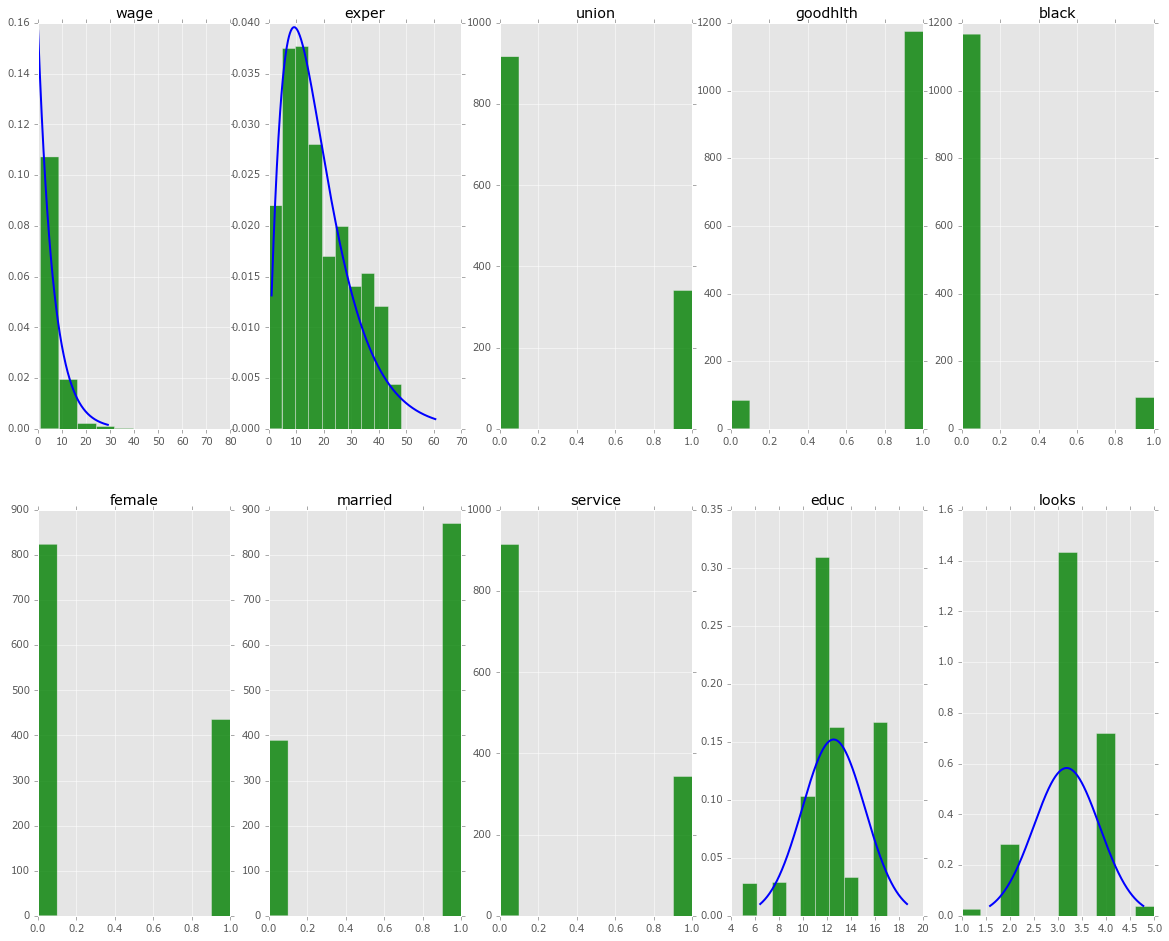

In [11]:
a2 = stats.chi2.fit(df['exper'])
print('exper: chi-squared distribution,', a2[0], 'degrees of freedom')
z2 = np.linspace(stats.chi2.ppf(0.01, a2[0], a2[1], a2[2]), stats.chi2.ppf(0.99, a2[0], a2[1], a2[2]), 500)

a1 = stats.expon.fit(df['wage'], floc=0)
print('wage: exponential distribution,','lambda=', a1[1])
z1 = np.linspace(stats.expon.ppf(0.01, a1[0], a1[1]), stats.expon.ppf(0.99, a1[0], a1[1]), 500)

a3 = stats.norm.fit(df['looks'],)
print('looks: normal distribution,','mean=',a3[0], 'sd=', a3[1])
z3 = np.linspace(stats.norm.ppf(0.01, a3[0], a3[1]), stats.norm.ppf(0.99, a3[0], a3[1]), 500)

a4 = stats.norm.fit(df['educ'],)
print('educ: normal distribution,', 'mean=',a4[0], 'sd=', a4[1])
z4 = np.linspace(stats.norm.ppf(0.01, a4[0], a4[1]), stats.norm.ppf(0.99, a4[0], a4[1]), 500)

print('Остальные признаки бинарные')

fig, ax = plt.subplots(2,5)
fig.set_size_inches(20,16)

ax[0,0].hist(df['wage'], normed=True, color='g', alpha=0.8)
ax[0,0].plot(z1, stats.expon.pdf(z1, a1[0], a1[1]),'b-', lw=2)
ax[0,0].set_title('wage')
ax[0,1].hist(df['exper'], normed=True, color='g', alpha=0.8)
ax[0,1].plot(z2, stats.chi2.pdf(z2, a2[0], a2[1], a2[2]),'b-', lw=2)
ax[0,1].set_title('exper')
ax[0,2].hist(df['union'], color='g', alpha=0.8)
ax[0,2].set_title('union')
ax[0,3].hist(df['goodhlth'], color='g', alpha=0.8)
ax[0,3].set_title('goodhlth')
ax[0,4].hist(df['black'], color='g', alpha=0.8)
ax[0,4].set_title('black')
ax[1,0].hist(df['female'], color='g', alpha=0.8)
ax[1,0].set_title('female')
ax[1,1].hist(df['married'], color='g', alpha=0.8)
ax[1,1].set_title('married')
ax[1,2].hist(df['service'], color='g', alpha=0.8)
ax[1,2].set_title('service')
ax[1,3].hist(df['educ'], normed=True, color='g', alpha=0.8)
ax[1,3].plot(z4, stats.norm.pdf(z4, a4[0], a4[1]),'b-', lw=2)
ax[1,3].set_title('educ')
ax[1,4].hist(df['looks'], normed=True,  color='g', alpha=0.8)
ax[1,4].plot(z3, stats.norm.pdf(z3, a3[0], a3[1]),'b-', lw=2)
ax[1,4].set_title('looks')

## 3. Метод наивного Байеса

Пояснения по выполнению этого задания будут рассказаны на семинаре 1 марта

Обучение методом наивного Байеса основывается на достаточно сильном предположении, что все признаки попарно независимы. По формуле Байеса $$P(y|x_1,\dots,x_n)=\frac{P(y)P(x_1,\dots,x_n|y)}{P(x_1,\dots,x_n)}.$$ В предположении, что признаки независимы получаем, что $$P(y|x_1,\dots,x_n)=\frac{P(y)\prod_{i=1}^n P(x_i|y)}{P(x_1,\dots,x_n)}$$
Т.к. $$P(x_1,\dots,x_n)$$ задается условиями задачи, принцип максимального правдоподобия для наивного Байеса запишется следующим образом: $$\hat y = \arg\max_y P(y)\prod_{i=1}^n P(x_i|y).$$


Библиотека `sklearn` поддерживает несколько реализаций наивного Байеса: `sklearn.naive_bayes.GaussianNB`, `sklearn.naive_bayes.MultinomialNB` и др.

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.datasets import fetch_20newsgroups
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

**Задание 1.** Выберите 2 категории новостных сообщений из `20newsgroups`. Случайным образом, в пропорции 70/30, разделите наборы текстов на обучающую и контрольную выборки. В результате выполнения данного задания у вас должно получится 5 переменных: `text_all`, `text_train`, `text_test`, `y_train`, `y_test`.

In [13]:
# Список новостных заголовков
['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [3]:
# загружаем данные, состоящие из: текста (.data), названия категорий каждого текста (.target_names) и признаков, 
# которые представляют собой numerical data, соотоносящиеся с target_names
categories = ['comp.graphics', 'sci.space']
newsgroups_all = fetch_20newsgroups(subset='all', categories=categories)

In [4]:
text_all = newsgroups_all.data
text_train, text_test, y_train, y_test = train_test_split(newsgroups_all.data, newsgroups_all.target, test_size = 0.3)

In [5]:
y_train

array([1, 1, 1, ..., 1, 0, 0])

In [16]:
# признаки 
print(y_train)

[0 0 1 ..., 1 1 0]


In [17]:
# текст
print(text_train)

["From: ewinterr@cwis.isu.edu (EWING_TERRY)\nSubject: Raytriacing and animation\nOrganization: Idaho State University, Pocatello\nLines: 14\nNNTP-Posting-Host: cwis.isu.edu\n\n\nNow I have a couple raytracing questions.\nJust so you know I'm using PovRay 1.0 (both MS-dos and Unix) and I'm generating Targa files of varying size.\n\n1) ok, so I can view these wonderful pictures on my screen.  What's the best way  to get them on to paper?  Would it be possible to take it to Kinko's and have   them make an actual picture on paper from it?\n\n2) I was thinking about making a small animation bit with different raytraced \nframes.  Is this a bad idea?  Any tricks to it?\n\n3\n\n)\n How would I get a sequence of targa files made into an animation \nthat I could put on a videotape?  Is there a cheap way?\n", "From: sloan@cis.uab.edu (Kenneth Sloan)\nSubject: Re: More gray levels out of the screen\nOrganization: CIS, University of Alabama at Birmingham\nLines: 22\n\nIn article <C51C4r.BtG@csc.ti

In [18]:
# Какие данные (каждому target name поставлен в соответствие target, т.е. str -> int) ?
print("\n".join(text_train[0].split("\n")[:15]))
# выводим 15 строк из первого текста train выборки
print("\n")
print('target - ', y_train[0])
print('target name - ', newsgroups_all.target_names[y_train[0]])


From: ewinterr@cwis.isu.edu (EWING_TERRY)
Subject: Raytriacing and animation
Organization: Idaho State University, Pocatello
Lines: 14
NNTP-Posting-Host: cwis.isu.edu


Now I have a couple raytracing questions.
Just so you know I'm using PovRay 1.0 (both MS-dos and Unix) and I'm generating Targa files of varying size.

1) ok, so I can view these wonderful pictures on my screen.  What's the best way  to get them on to paper?  Would it be possible to take it to Kinko's and have   them make an actual picture on paper from it?

2) I was thinking about making a small animation bit with different raytraced 
frames.  Is this a bad idea?  Any tricks to it?



target -  0
target name -  comp.graphics


In [19]:
print('Всего строчек:', len(text_all))
print('train строчек:', len(text_train))
print('test строчек:', len(text_test))

Всего строчек: 1960
train строчек: 1372
test строчек: 588


**Задание 2.** На переменной `text` постройте конвертер из текстов в частотную матрицу с помощью метода `CountVectorizer(analyzer='word', stop_words='english', lowercase=True)`, а затем используйте его на выборках `train` и `test`. В результате вы должны получить 2 матрицы: `X_train` и `X_test`.

In [20]:
# Пример того, как CountVectorizer строит частотную матрицу 
cv = CountVectorizer(lowercase=True)
dat = cv.fit_transform(['Pease porridge hot hot', 'pease Porridge cold old', 'pease porridge in the pot', 
                  'nine days old']).toarray()
print(pd.DataFrame(dat, columns=[cv.get_feature_names()]))

   cold  days  hot  in  nine  old  pease  porridge  pot  the
0     0     0    2   0     0    0      1         1    0    0
1     1     0    0   0     0    1      1         1    0    0
2     0     0    0   1     0    0      1         1    1    1
3     0     1    0   0     1    1      0         0    0    0


In [21]:
# Получим матрицу, где rows - тексты, a columns - слова, пересечение - количество слова в строке   
vectorizer = CountVectorizer(analyzer='word', stop_words='english', lowercase=True)
# fit_transform() does two functions: First, it fits the model and learns the vocabulary; 
# second, it transforms our training data into feature vectors. 
# The input to fit_transform should be a list of strings.
vectorizer.fit(text_all)
X_train = vectorizer.transform(text_train).toarray()
X_test = vectorizer.transform(text_test).toarray()
print("строчек: %d, features: %d" % X_train.shape)
print(X_train)
print("строчек: %d, features: %d" % X_test.shape)
print(X_test)

строчек: 1372, features: 30399
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
строчек: 588, features: 30399
[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [2 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]


**Задание 3.** По матрице `X_train` найдите 50 самых частотных слов. Соответствия столбцов и слов можно понять по методу `CountVectorizer.get_feature_names()`.

In [22]:
df3=pd.DataFrame({'Number of entries':np.sum(X_train, axis=0), 'word':vectorizer.get_feature_names()})
df3.sort_values(by='Number of entries', ascending=False)[:50]

,Number of entries,word
11197,2629,edu
25573,1548,space
26341,1479,subject
17454,1457,lines
20427,1388,organization
8376,1071,com
29978,845,writes
19391,830,nasa
5412,745,article
13825,744,graphics


**Задание 4.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=1` на выборке train. Примените его к данным из тестовой выборке и оцените точность совпадения меток.

In [23]:
model = MultinomialNB(alpha=1.0).fit(X_train, y_train)
predicted = model.predict(X_test)
probs = model.predict_proba(X_test)

In [31]:
print('predictive power = ', np.mean(predicted == y_test))

predictive power =  0.979591836735


In [32]:
print('predicted probabilities = ', probs)

predicted probabilities =  [[  1.00000000e+00   3.71584718e-56]
 [  4.98282049e-46   1.00000000e+00]
 [  1.00000000e+00   1.32749263e-58]
 ..., 
 [  1.00000000e+00   2.48065973e-39]
 [  9.99999819e-01   1.81420481e-07]
 [  1.00000000e+00   4.83329527e-30]]


In [33]:
from sklearn import metrics
print(metrics.classification_report(y_test, predicted, target_names=newsgroups_all.target_names))

               precision    recall  f1-score   support

comp.graphics       0.97      0.99      0.98       293
    sci.space       0.99      0.97      0.98       295

  avg / total       0.98      0.98      0.98       588



**Задание 5.** Обучите наивный байесовский классификатор MultinomialNB с параметром слгаживания `alpha=0` на выборке train. Примените его к данным из тестовой выборки и оцените точность совпадения меток. Поменяются ли результаты? Объясните почему?

Учитывайте не только метки, но и вероятности, которые выдает классификатор

In [43]:
model2 = MultinomialNB(alpha=0.0).fit(X_train, y_train)
predicted2 = model2.predict(X_test)
probs2 = model2.predict_proba(X_test)

In [35]:
print('predictive power = ', np.mean(predicted2 == y_test))

predictive power =  0.498299319728


In [44]:
predicted2

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [36]:
print('predicted probabilities = ', probs2)

predicted probabilities =  [[ nan  nan]
 [ nan  nan]
 [ nan  nan]
 ..., 
 [ nan  nan]
 [ nan  nan]
 [ nan  nan]]


In [37]:
print(metrics.classification_report(y_test, predicted2, target_names=newsgroups_all.target_names))

               precision    recall  f1-score   support

comp.graphics       0.50      1.00      0.67       293
    sci.space       0.00      0.00      0.00       295

  avg / total       0.25      0.50      0.33       588



/Users/ulybinaleksandr/anaconda/lib/python3.5/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Результаты поменялись. Проблема в том, что для модели со многими признаками нулевое количество успехов для встречи какого-то слова подразумевает нулевую вероятность. А, учитывая предположение, на котором основан алгоритм (независимость признаков, следовательно можно перемножить вероятности), получается, что результатом умножения будет 0. То есть вероятность текста принадлежать определенной категории = 0, то есть это невозможно. 

Получается, что мы недооцениваем вероятность для тех слов, которые мы не встретили в данных. Чтобы избежать этой проблемы используют Laplace’s law of succession или add one smoothing. В основе этого правила лежит предположение: если мы не встретили слово в тексте, то все равно существует вероятность, того что наша выборка просто не включает тексты с этим словом. Поэтому, используя add-one smoothing мы предполагаем, что встречали каждое слово на один раз больше, чем на самом деле, то есть будет считать, что P(word | Class=k) > 0. 

Пусть событие происходит с неизвестной вероятностью p, Laplace's law of succession предполагает, что если априори мы считали, что все значения p равновероятны, то апостериори, после наблюдения r исходов из n экспериментов, следует считать достоверной оценкой p: $$\hat{p}=\frac{r+1}{n+2} $$